Este código compara las TF de las variables en distintos puntos 
de la simulación.


OJO!! LOS GRAFICOS SE HACEN NORMALIZANDO PARA PODER IDENTIFICAR CUANDO HAY PICOS EN LA MISMA FRECUENCIA

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy.polynomial.polynomial as poly
import matplotlib
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors


In [99]:
pathrw='/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/'
#pathrw = '/media/adminpc/Hilario-2/Tesis/Analísis/Mayo/'

simulacion ='pulso_3'
#simulacion ='desequilibrio_5'

pos1= '0.2_20.0'
tint='100_500_'
fmin = 2.5
fmax =50.
path=pathrw +simulacion+'/'+simulacion+'_'+pos1+'_TF_'+tint
#path = path+ pos1+'_TF_'+tint

In [100]:
with open( path + 'velx.txt') as velx:
    velxlines = velx.readlines()[2:]
    time  = [float(line.split()[0]) for line in velxlines]
    velxx = [float(line.split()[1]) for line in velxlines]
with open( path + 'vely.txt') as vely:
    velylines = vely.readlines()[2:]
    velyy = [float(line.split()[1]) for line in velylines]
    
with open( path + 'magx.txt') as magx:
    magxlines = magx.readlines()[2:]
    magxx = [float(line.split()[1]) for line in magxlines]
    
with open( path + 'magy.txt') as magy:
    magylines = magy.readlines()[2:]
    magyy = [float(line.split()[1]) for line in magylines]
    
with open( path + 'dens.txt') as dens:
    denslines = dens.readlines()[2:]
    densy = [float(line.split()[1]) for line in denslines]
    
with open( path + 'pres.txt') as pres:
    preslines = pres.readlines()[2:]
    presy = [float(line.split()[1]) for line in preslines]

In [101]:
velx = np.array(velxx)
vely = np.array(velyy)
magx = np.array(magxx)
magy = np.array(magyy)
dens = np.array(densy)
pres = np.array(presy)
time = np.array(time)

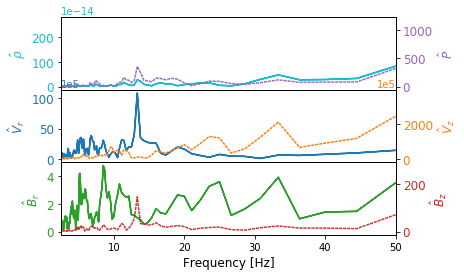

In [102]:
fig, axs = plt.subplots(3, sharex=True)
fig.subplots_adjust(hspace=0.)


color = 'tab:cyan'
axs[0].set_ylabel(r'$\hat{\rho}$', color=color, fontsize=12)
axs[0].plot(1/time, dens, color=color, linestyle='-', label =r'$\hat{\rho}$')
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(-14,-14))
axs[0].tick_params(axis='y', labelcolor=color,labelsize=12)

ax2 = axs[0].twinx()

color = 'tab:purple'
ax2.set_ylabel(r'$\hat{P}$', color=color, fontsize=12)
ax2.plot(1/time, pres, color=color, linestyle=':', label =r'$\hat{P}$')
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)

#Second plot



color = 'tab:blue'
axs[1].set_ylabel(r'$\hat{V}_r$', color=color, fontsize=12)
axs[1].plot(1/time, velx, color=color, linestyle='-', label =r'$\hat{V}_r$')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(5,5))
axs[1].tick_params(axis='y', labelcolor=color,labelsize=12)
axs[1].set_xlim(fmin, fmax)

ax2 = axs[1].twinx()

color = 'tab:orange'
ax2.set_ylabel(r'$\hat{V}_z$', color=color, fontsize=12)
ax2.plot(1/time, vely, color=color, linestyle=':', label =r'$\hat{V}_z$')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)

#Third plot

color = 'tab:green'
axs[2].set_ylabel(r'$\hat{B}_r$', color=color, fontsize=12)
axs[2].plot(1/time, magx, color=color, linestyle='-', label =r'$\hat{B}_r$')
axs[2].tick_params(axis='y', labelcolor=color,labelsize=12)
axs[2].set_xlabel('Frequency [Hz]', fontsize=12)

ax2 = axs[2].twinx()

color = 'tab:red'
ax2.set_ylabel(r'$\hat{B}_z$', color=color, fontsize=12)
ax2.plot(1/time, magy, color=color, linestyle=':', label =r'$\hat{B}_z$')
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)


#VrVz.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig(pathrw+ simulacion +'/'+simulacion+'_'+'comparación_TF_'+pos1+'.pdf', bbox_inches='tight')   

In [41]:
pathrw+ simulacion +'/'+simulacion+'_'+'comparación_TF_'+pos1+'.pdf'

'/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/pulso_3/pulso_3_comparación_TF_0.2_20.0.pdf'

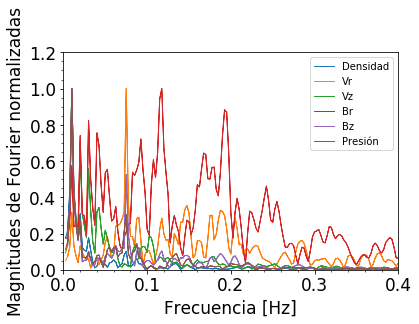

In [24]:
A='Dens'
#A=''
B='Vr'
#B=''
C='Vz'
#C=''
D='Br'
#D=''
E='Bz'
#E=''
F='Pres'
#F=''


if A=='Dens':
    plt.plot(time,dens/np.max(dens),label='Densidad', linewidth=1)
if B=='Vr': 
    plt.plot(time,velx/np.max(velx),label='Vr', linewidth=1)
if C=='Vz':
    plt.plot(time,vely/np.max(vely),label='Vz', linewidth=1)
if D=='Br':
    plt.plot(time,magx/np.max(magx),label='Br', linewidth=1)
if E=='Bz':
    plt.plot(time,magy/np.max(magy),label='Bz', linewidth=1)
if F=='Pres':
    plt.plot(time,pres/np.max(pres),label='Presión', linewidth=1)

plt.legend()
plt.xlim(fmin, fmax)
plt.ylim(0, 1.2)
plt.tick_params( labelsize=17)
plt.ylabel('Magnitudes de Fourier normalizadas',fontsize=17)  
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.minorticks_on()


#plt.savefig(pathrw+ simulacion +'/'+'comparación_TF_'+pos1+'_'+A+B+C+D+E+F+'.pdf', bbox_inches='tight')   

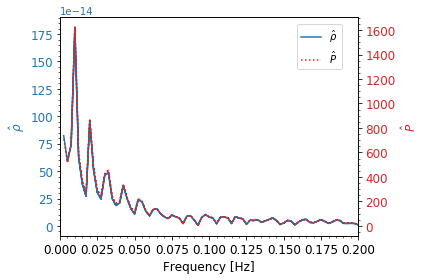

In [58]:
DensPres, ax1 = plt.subplots()
plt.xlim(fmin, fmax)

color = 'tab:blue'
ax1.minorticks_on()
ax1.set_xlabel('Frequency [Hz]', fontsize=12)
ax1.set_ylabel(r'$\hat\rho$', color=color, fontsize=12)
ax1.plot(time, dens, color=color, linestyle='-', label =r'$\hat\rho$')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(-14,-14))
ax1.tick_params(axis='y', labelcolor=color,labelsize=12)
ax1.tick_params(axis='x',labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.minorticks_on()
ax2.set_ylabel(r'$\hat{P}$', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(time, pres, color=color, linestyle=':', label =r'$\hat{P}$')
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)

DensPres.legend(loc=(0.7,0.75))
DensPres.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#DensPres.savefig(pathrw+ simulacion +'/'+simulacion+'_'+'comparación_TF_DensPres.pdf', bbox_inches='tight') 

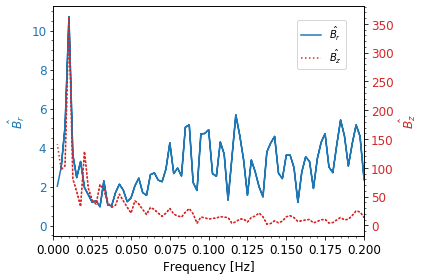

In [59]:
BrBz, ax1 = plt.subplots()
plt.xlim(fmin, fmax)

color = 'tab:blue'
ax1.minorticks_on()
ax1.set_xlabel('Frequency [Hz]', fontsize=12)
ax1.set_ylabel(r'$\hat{B_r}$', color=color, fontsize=12)
ax1.plot(time, magx, color=color, linestyle='-', label =r'$\hat{B_r}$')
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(-14,-14))
ax1.tick_params(axis='y', labelcolor=color,labelsize=12)
ax1.tick_params(axis='x',labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.minorticks_on()
ax2.set_ylabel(r'$\hat{B_z}$', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(time, magy, color=color, linestyle=':', label =r'$\hat{B_z}$')
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)

BrBz.legend(loc=(0.7,0.75))
BrBz.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#BrBz.savefig(pathrw+ simulacion +'/'+simulacion+'_'+'comparación_TF_BrBz.pdf', bbox_inches='tight')   

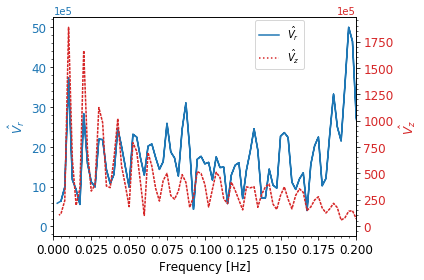

In [60]:
VrVz, ax1 = plt.subplots()
plt.xlim(fmin, fmax)

color = 'tab:blue'
ax1.minorticks_on()
ax1.set_xlabel('Frequency [Hz]', fontsize=12)
ax1.set_ylabel(r'$\hat{V_r}$', color=color, fontsize=12)
ax1.plot(time, velx, color=color, linestyle='-', label =r'$\hat{V_r}$')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.tick_params(axis='y', labelcolor=color,labelsize=12)
ax1.tick_params(axis='x',labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.minorticks_on()
ax2.set_ylabel(r'$\hat{V_z}$', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(time, vely, color=color, linestyle=':', label =r'$\hat{V_z}$')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.tick_params(axis='y', labelcolor=color,labelsize=12)

VrVz.legend(loc=(0.6,0.75))
VrVz.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#VrVz.savefig(pathrw+ simulacion +'/'+simulacion+'_'+'comparación_TF_VrVz.pdf', bbox_inches='tight')   

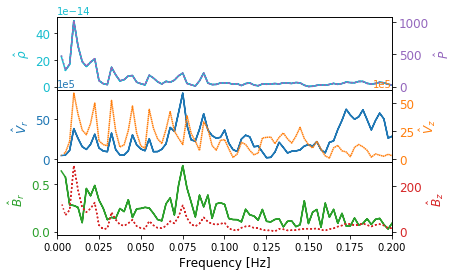